The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
from google.colab import files
upload= files.upload()

Saving boston_housing.csv to boston_housing (2).csv


In [ ]:
import pandas as pd
df=pd.read_csv("boston_housing.csv", index_col="Unnamed: 0")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


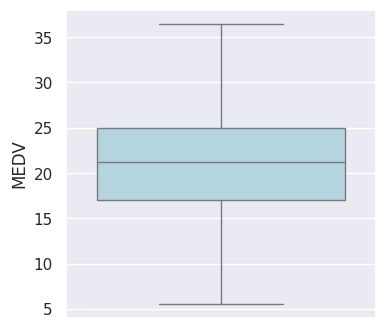

In [ ]:
#For the "Median value of owner-occupied homes" provide a boxplot
import seaborn as sns
import matplotlib as plt
#sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
sns.set_style("darkgrid")
sns.set_theme(rc={'figure.figsize':(4,4)})
ax = sns.boxplot(y=df["MEDV"], data=df,showmeans=False, showfliers=False, color="lightblue")

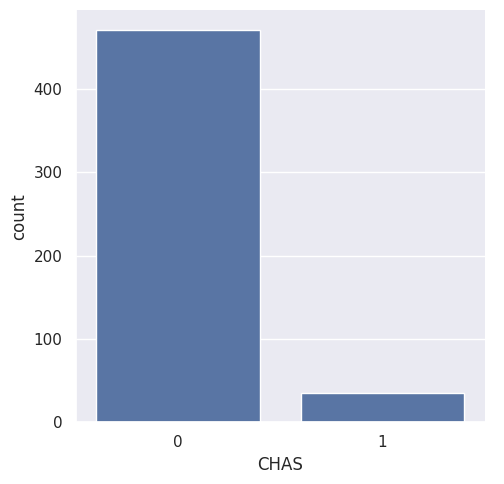

In [ ]:
#Provide a bar plot for the Charles river variable
sns.catplot(x='CHAS', kind='count', data=df,)

Text(0.5, 1.0, 'Proportion of owner-occupied units \nmore than 70')

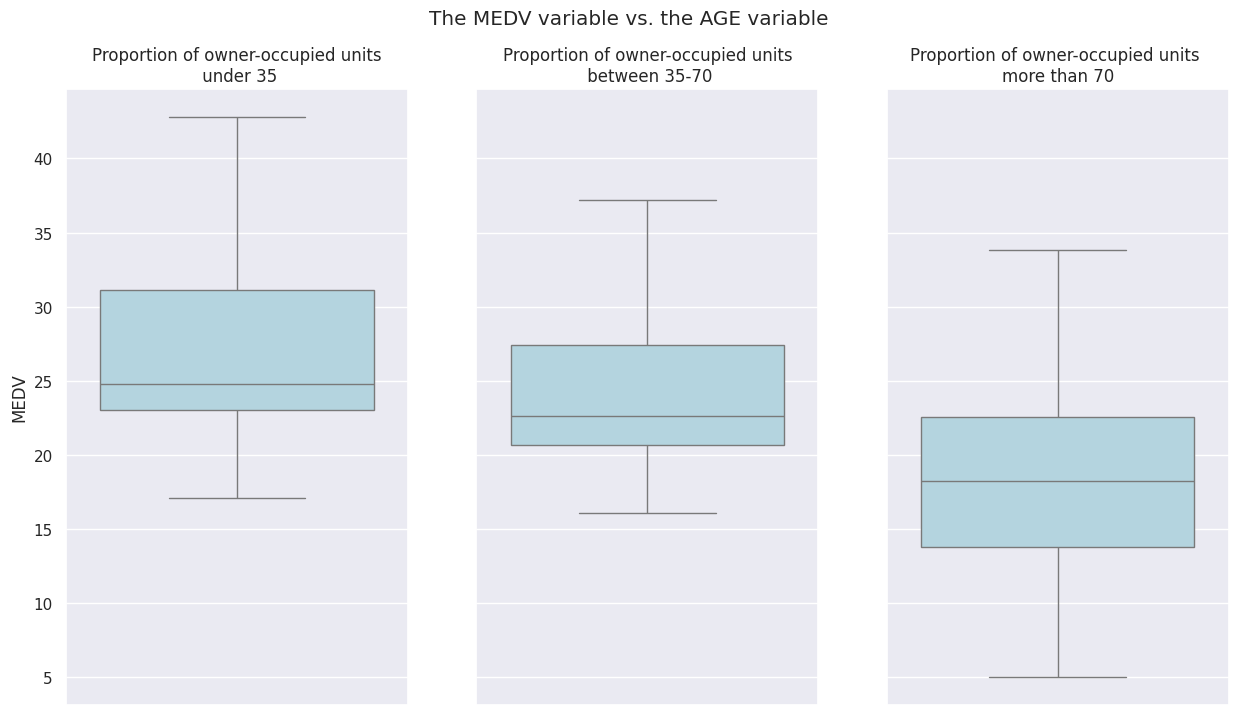

In [ ]:
#Provide a boxplot for the MEDV variable vs the AGE variable.
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
from matplotlib import pyplot as plt

df["AGE"].unique()

under35= df[df["AGE"]<= 35]
mid= df[(df["AGE"]> 35)&(df["AGE"]<= 70)]
more70= df[df["AGE"]> 70]

#print(under35.count(),mid.count(),more70.count())

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,8), sharey= True)
fig.suptitle('The MEDV variable vs. the AGE variable')

fig = sns.boxplot(y=df[df["AGE"]<= 35]["MEDV"], data=df ,showmeans=False, showfliers=False, color="lightblue", ax=axes[0])
axes[0].set_title("Proportion of owner-occupied units\n under 35")

fig = sns.boxplot(y=df[(df["AGE"]> 35)&(df["AGE"]<= 70)]["MEDV"], data=df ,showmeans=False, showfliers=False, color="lightblue",ax=axes[1])
axes[1].set_title("Proportion of owner-occupied units\n between 35-70")

fig = sns.boxplot(y=df[df["AGE"]> 70].MEDV, data=df ,showmeans=False, showfliers=False, color="lightblue",ax=axes[2])
axes[2].set_title("Proportion of owner-occupied units \nmore than 70")

#ax1 = sns.boxplot(y="MEDV", data=df ,showmeans=False, showfliers=False, color="lightblue")
#ax2 = sns.boxplot(y="MEDV", data=df ,showmeans=False, showfliers=False, color="lightblue")




Text(0.5, 1.0, 'The relationship between "Nitric oxide concentrations" \nand "The proportion of non-retail business acres per town"')

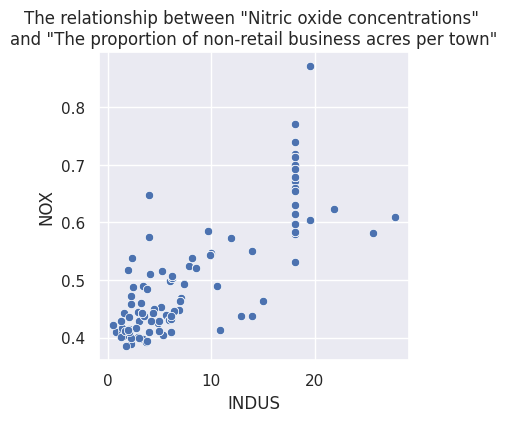

In [ ]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
# What can you say about the relationship?

fig = sns.scatterplot(x='INDUS', y='NOX', data=df,)
figsize=(10,10)
fig.set_title("The relationship between \"Nitric oxide concentrations\" \nand \"The proportion of non-retail business acres per town\"")

<Axes: xlabel='PTRATIO', ylabel='Count'>

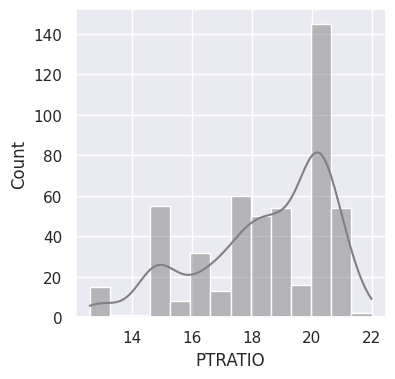

In [ ]:
#Create a histogram for the pupil to teacher ratio variable

sns.histplot(df["PTRATIO"], color='gray', kde=True,)


In [ ]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# We have to divide the database between the houses bounded by the river vs not bounded

medb= df.groupby("CHAS").agg({"MEDV":("mean", "count")})#.reset_index()
print(medb)
# we are looking for a significant difference, between two independent samples, so we use the two tailed t test for independent samples
#H0: the two means are equal mean0=mean1
#H1: the two means are not equal mean1 != mean0

import scipy.stats as stats
dfchar= df[df["CHAS"]==1]["MEDV"]
dfnchar=df[df["CHAS"]==0]["MEDV"]

lv= stats.levene(dfchar, dfnchar, center= "mean")
print(f"Levene's test p-Value:{lv[1]}")
tv=stats.ttest_ind(dfchar, dfnchar, equal_var="False")
print(tv)

           MEDV      
           mean count
CHAS                 
0     22.093843   471
1     28.440000    35
Levene's test p-Value:0.003238119367639829
TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)


<Axes: xlabel='MEDV', ylabel='Count'>

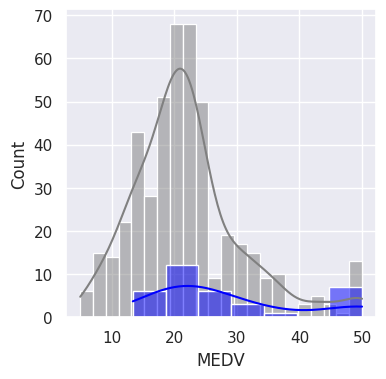

In [ ]:
sns.histplot(df[df["CHAS"]==0]["MEDV"], color='gray', kde=True)
sns.histplot(df[df["CHAS"]==1]["MEDV"], color='blue', kde=True)

In [ ]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

under351= df[df["AGE"]<= 35]["MEDV"]
mid1= df[(df["AGE"]> 35)&(df["AGE"]<= 70)]["MEDV"]
more701= df[df["AGE"]> 70]["MEDV"]

lv1= stats.levene(under351, mid1, more701, center= "mean")
print(lv1)
tv1=stats.f_oneway(under351, mid1, more701)
print(tv1)
# the means of the three groups are not equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)
F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)


In [ ]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

stats.pearsonr(df["INDUS"], df["NOX"])

#there is a positive correlation

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

In [ ]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

import statsmodels.api as sm
X = df["DIS"]
y= df["MEDV"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

predictions = model.predict(X)

model.summary()

# An increse in the DIS will lead to an additional 1.0916 increase in the MEDV

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        14:30:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""